In [1]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor




In [2]:
#2.load datasets
df=pd.read_csv('Housing.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
#3.Initial Exploration
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
484,2870000,3040,2,1,1,no,no,no,no,no,0,no,unfurnished
31,8400000,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
177,5243000,6050,3,1,1,yes,no,yes,no,no,0,yes,semi-furnished
352,3780000,5830,2,1,1,yes,no,no,no,no,2,no,unfurnished
306,4165000,4840,3,1,2,yes,no,no,no,no,1,no,semi-furnished


In [6]:
print("\nNumber of duplicate value:")
df.duplicated().sum()


Number of duplicate value:


np.int64(0)

In [7]:
print("\nNumber of null value:")
df.isna().sum()



Number of null value:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
print("\ndatatype:")
df.dtypes


datatype:


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
df.values

array([[13300000, 7420, 4, ..., 2, 'yes', 'furnished'],
       [12250000, 8960, 4, ..., 3, 'no', 'furnished'],
       [12250000, 9960, 3, ..., 2, 'yes', 'semi-furnished'],
       ...,
       [1750000, 3620, 2, ..., 0, 'no', 'unfurnished'],
       [1750000, 2910, 3, ..., 0, 'no', 'furnished'],
       [1750000, 3850, 3, ..., 0, 'no', 'unfurnished']], dtype=object)

In [12]:
# 4. DATA CLEANING AND TRANSFORMATION
     # Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


<Axes: >

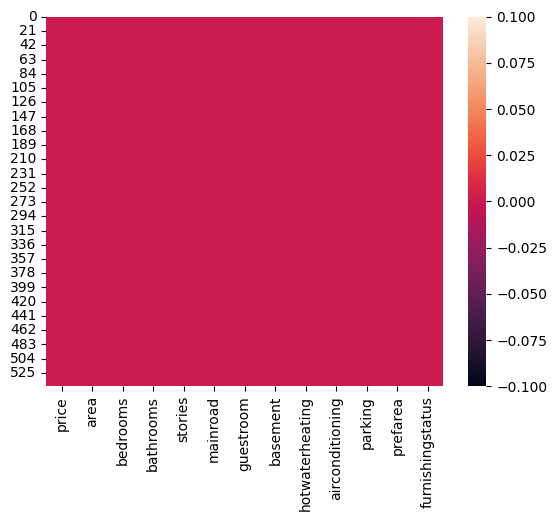

In [13]:
sns.heatmap(df.isnull())

In [14]:
# Outlier detection using IQR
print("\nBefore Outlier Removal, Shape:", df.shape)

def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

df = remove_outliers(df, "price")
df = remove_outliers(df, "area")

print("\nAfter Outlier Removal, Shape:", df.shape)


Before Outlier Removal, Shape: (545, 13)

After Outlier Removal, Shape: (517, 13)


In [15]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [16]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [17]:
df['furnishingstatus'].unique()

array(['semi-furnished', 'unfurnished', 'furnished'], dtype=object)

In [18]:
df.nunique()

price               205
area                267
bedrooms              6
bathrooms             3
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [19]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [20]:
# Convert Yes/No to 1/0
binary_cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
for col in binary_cols:
    df[col] = df[col].map({"yes":1, "no":0})

# Encode furnishingstatus
df["furnishingstatus"] = df["furnishingstatus"].map({
    "furnished": 2,
    "semi-furnished": 1,
    "unfurnished": 0
})

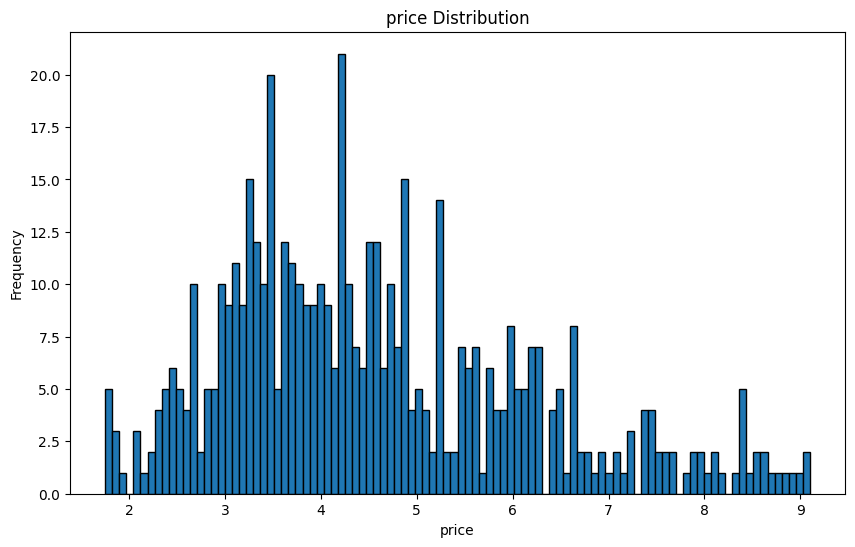

In [21]:
# 5. EXPLORATORY DATA ANALYSIS (EDA)
plt.figure(figsize=(10, 6))
plt.hist(df['price']/1000000, bins=100,edgecolor='black')
plt.title('price Distribution')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

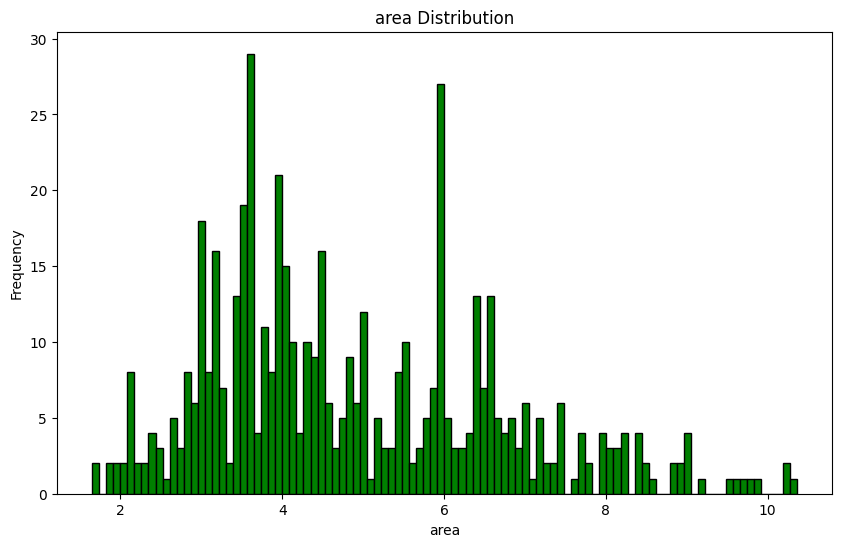

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['area']/1000, bins=100, color='green',  edgecolor='black')
plt.title('area Distribution')
plt.xlabel('area')
plt.ylabel('Frequency')
plt.show()

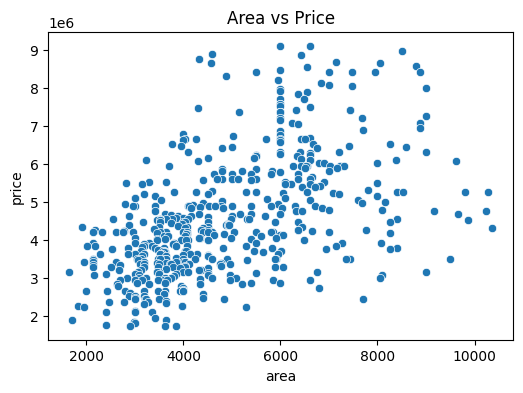

In [23]:
# Area vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["area"], y=df["price"])
plt.title("Area vs Price")
plt.show()

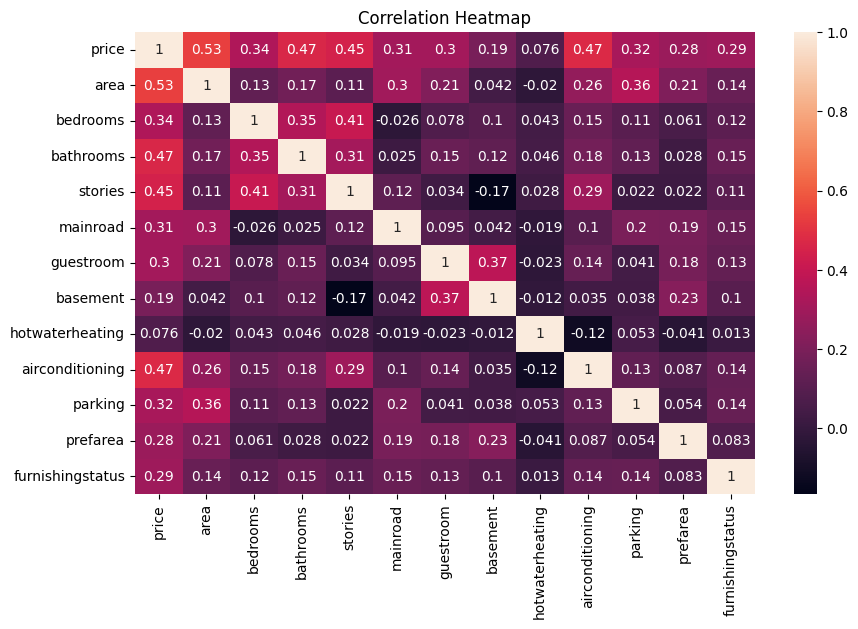

In [24]:

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

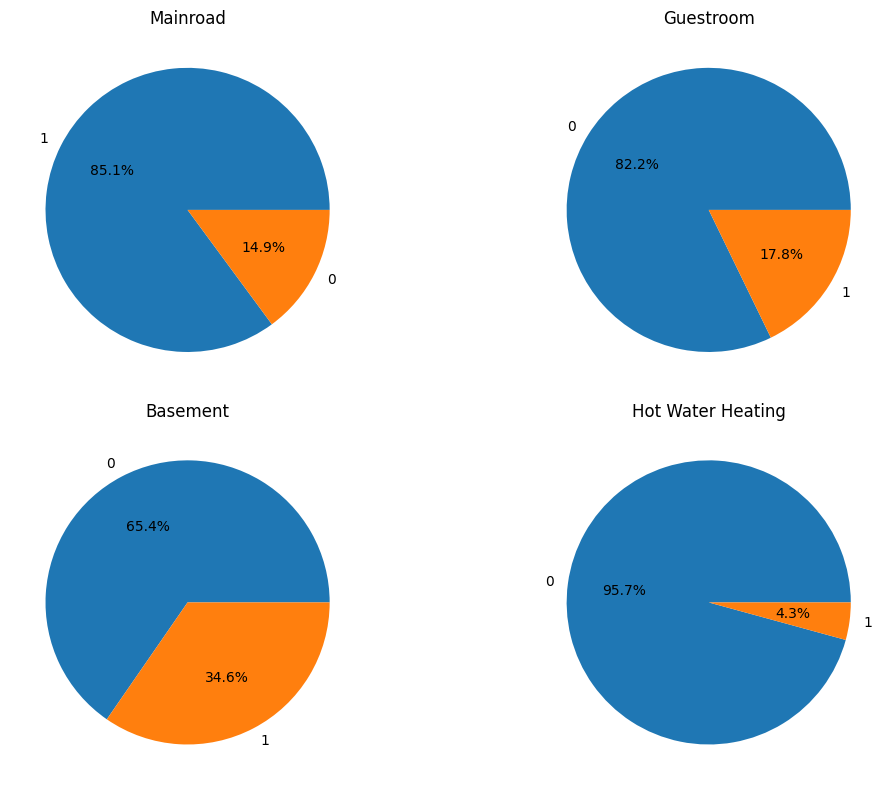

In [25]:
fig = plt.figure(figsize=(12, 8))

# mainroad
ax1 = fig.add_subplot(2, 2, 1)
data1 = df['mainroad'].value_counts()
ax1.pie(data1, labels=data1.index, autopct='%1.1f%%')
ax1.set_title('Mainroad')

# guestroom
ax2 = fig.add_subplot(2, 2, 2)
data2 = df['guestroom'].value_counts()
ax2.pie(data2, labels=data2.index, autopct='%1.1f%%')
ax2.set_title('Guestroom')

# basement
ax3 = fig.add_subplot(2, 2, 3)
data3 = df['basement'].value_counts()
ax3.pie(data3, labels=data3.index, autopct='%1.1f%%')
ax3.set_title('Basement')

# hotwaterheating
ax4 = fig.add_subplot(2, 2, 4)
data4 = df['hotwaterheating'].value_counts()
ax4.pie(data4, labels=data4.index, autopct='%1.1f%%')
ax4.set_title('Hot Water Heating')

plt.tight_layout()
plt.show()

In [26]:
#6. FEATURE SELECTION

correlation = df.corr()["price"].sort_values(ascending=False)
print("\nFeature Correlations with Price:")
print(correlation)


Feature Correlations with Price:
price               1.000000
area                0.533186
airconditioning     0.471706
bathrooms           0.466483
stories             0.446839
bedrooms            0.335328
parking             0.321058
mainroad            0.307185
guestroom           0.303994
furnishingstatus    0.291663
prefarea            0.280808
basement            0.190117
hotwaterheating     0.075979
Name: price, dtype: float64


In [27]:

# Define features
X = df.drop("price", axis=1)
y = df["price"]

In [28]:
# Scale numerical features #mean=0,sd=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# 7. MODEL DEVELOPMENT

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [30]:
X_train

array([[-1.33343058,  2.81538629,  1.58926802, ...,  0.41092243,
        -0.52587376,  1.44054864],
       [-0.38825716,  0.07938119, -0.56165231, ...,  0.41092243,
        -0.52587376,  1.44054864],
       [ 1.18703186,  0.07938119, -0.56165231, ...,  2.78463078,
        -0.52587376,  1.44054864],
       ...,
       [-0.70331497,  0.07938119,  1.58926802, ..., -0.77593174,
        -0.52587376, -1.19578286],
       [-1.01274674, -1.28862136, -0.56165231, ..., -0.77593174,
        -0.52587376, -1.19578286],
       [ 0.76732986,  1.44738374,  1.58926802, ...,  0.41092243,
         1.90159707,  0.12238289]])

In [31]:

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results.append({
        "name": name,
        "mae": mean_absolute_error(y_test, preds),
        "rmse": np.sqrt(mean_squared_error(y_test, preds)),
        "r2": r2_score(y_test, preds)
    })

results_df = pd.DataFrame(results).sort_values("rmse")
display(results_df)

best_model_name = results_df.iloc[0]["name"]
print("Best baseline model:", best_model_name)



,name,mae,rmse,r2
1,Ridge,742629.716685,9.887330e+05,0.666785
0,LinearRegression,742678.286297,9.887694e+05,0.666760
2,Lasso,742678.259887,9.887694e+05,0.666760
4,GradientBoosting,749865.751629,1.013353e+06,0.649984
3,RandomForest,757737.979808,1.023286e+06,0.643088


Best baseline model: Ridge


In [32]:

best_model = models[best_model_name]

cv_scores = cross_val_score(
    best_model,
    X_train,
    y_train,
    cv=5,
    scoring="r2"
)

print(f"CV R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


CV R²: 0.587 ± 0.131


In [33]:


param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [5, 10]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best CV R²:", grid.best_score_)
print("Best Params:", grid.best_params_)




Best CV R²: 0.5932831558926204
Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [34]:

final_model = grid.best_estimator_
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Final Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Final Test R²:", r2_score(y_test, y_pred))

Final Test RMSE: 1022693.5293755989
Final Test R²: 0.6435015064889488


In [35]:
import pickle
# Save the model to a file
with open("housepre_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("Model saved as housepre_model.pkl")

# ------------------------------
# Load the model
# ------------------------------
with open("housepre_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test loaded model
y_pred = loaded_model.predict(X_test)

Model saved as housepre_model.pkl
